<h1>Extra Trees Classifier</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
warnings.filterwarnings('ignore')

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,8]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)

plt = setup_matplot()

In [3]:
path = 'database/diabetes.csv'

df = pd.read_csv(f'{path}')

In [4]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

In [5]:
features_names = list(X.columns)

features_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
tree = ExtraTreesClassifier(n_estimators=10)

tree = tree.fit(X,y)

In [9]:
importances = tree.feature_importances_

In [10]:
tree_importances = pd.Series(importances, index=features_names)

In [11]:
tree_df = pd.DataFrame(tree_importances).reset_index().rename(columns={'index':'Feature', 0:'Importancy'})

tree_df.sort_values(by='Importancy', ascending=False, inplace=True)

tree_df

,Feature,Importancy
1,Glucose,0.231438
7,Age,0.142655
5,BMI,0.140237
6,DiabetesPedigreeFunction,0.122910
0,Pregnancies,0.108055
2,BloodPressure,0.095963
3,SkinThickness,0.087604
4,Insulin,0.071138


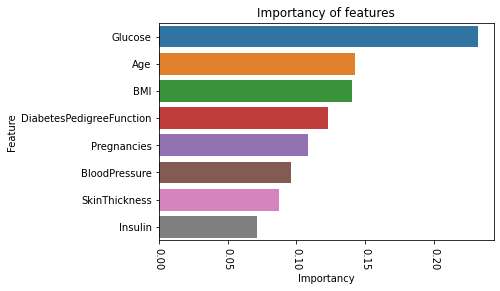

In [12]:
sns.barplot(data=tree_df, y='Feature', x='Importancy')
plt.title('Importancy of features')
plt.xticks(rotation=270)
plt.show()